<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

En esta tarea, predeciremos si la primera etapa del Falcon 9 aterrizará con éxito. SpaceX anuncia en su sitio web el lanzamiento del cohete Falcon 9 con un costo de 62 millones de dólares; otros proveedores cuestan más de 165 millones de dólares cada uno. Gran parte del ahorro se debe a que SpaceX puede reutilizar la primera etapa.

En este laboratorio, realizarás análisis exploratorio de datos e ingeniería de características.

Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


## Objetivos
Realizar análisis exploratorio de datos e ingeniería de características con `Pandas` y `Matplotlib`

- Análisis exploratorio de datos
- Preparación de la ingeniería de características de datos


----


Install the below libraries


In [2]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [3]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


Primero, leamos el conjunto de datos de SpaceX en un marco de datos de Pandas e imprimamos su resumen


In [4]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

Primero, veamos cómo las variables `FlightNumber` (que indica los intentos de lanzamiento continuos) y `Payload` afectarían el resultado del lanzamiento.

Podemos representar gráficamente el valor de <code>FlightNumber</code> frente a <code>PayloadMass</code> y superponer el resultado del lanzamiento. Observamos que, a medida que aumenta el número de vuelo, la primera etapa tiene más probabilidades de aterrizar con éxito. La masa de la carga útil también es importante; parece que cuanto mayor sea la carga útil, menor será la probabilidad de que la primera etapa regrese.


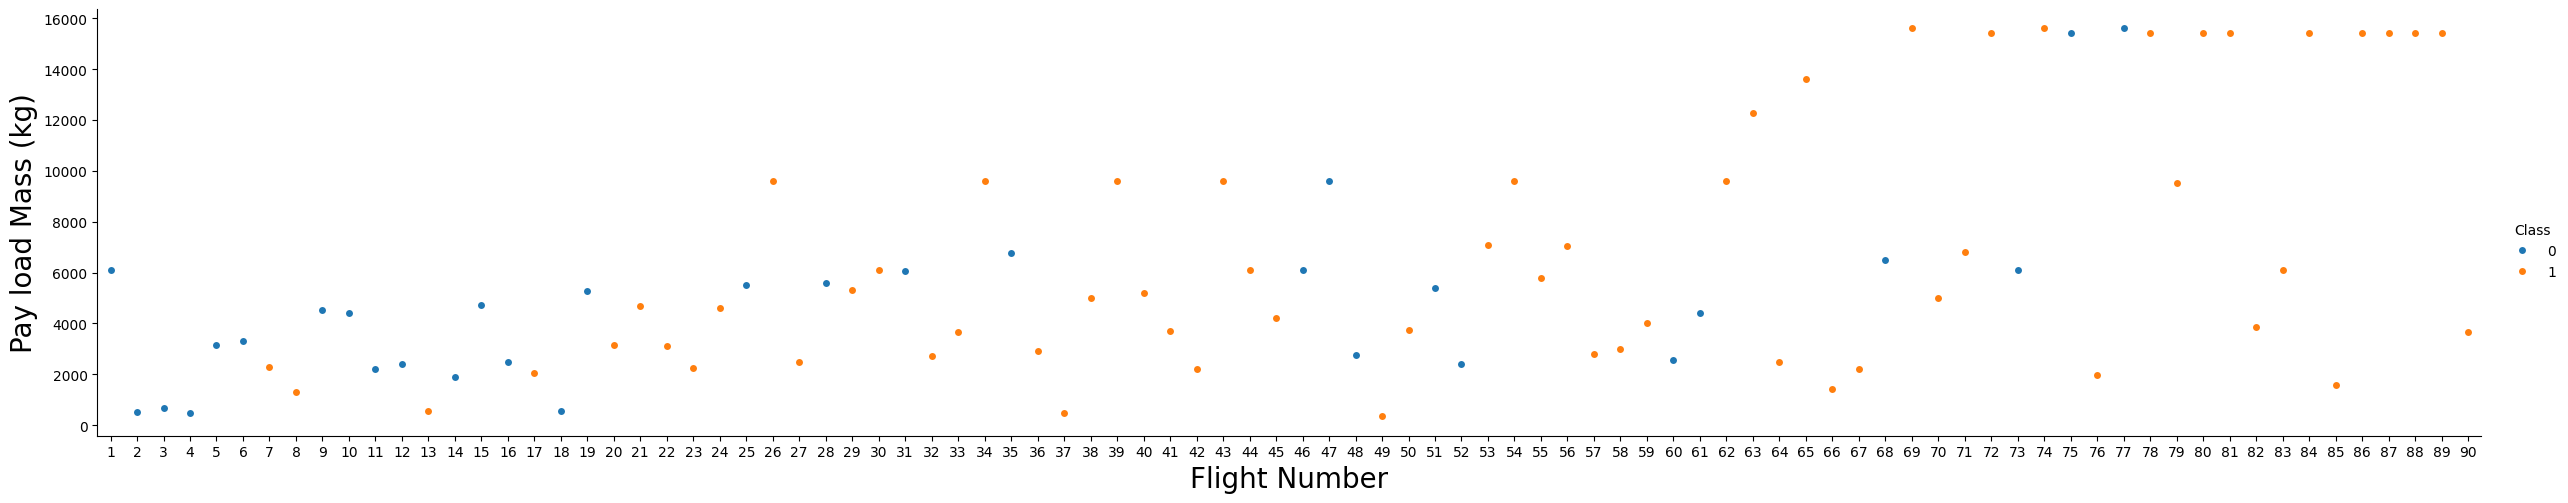

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

A continuación, analicemos en profundidad cada sitio para visualizar sus registros de lanzamiento detallados.


### TAREA 1: Visualizar la relación entre el número de vuelo y el lugar de lanzamiento


Utilice la función <code>catplot</code> para representar gráficamente <code>FlightNumber</code> frente a <code>LaunchSite</code>, establezca el parámetro <code>x</code> en <code>FlightNumber</code>, establezca <code>y</code> en <code>Launch Site</code> y establezca el parámetro <code>hue</code> en <code>'class'</code>.


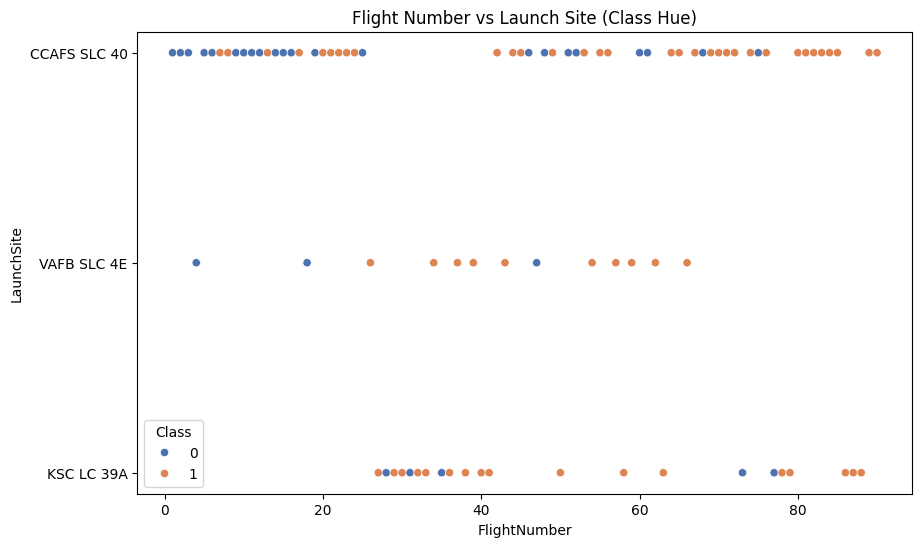

In [8]:
# Dibuje un gráfico de puntos de dispersión con el eje x como número de vuelo, el eje y como sitio de lanzamiento y el tono como valor de clase.
# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', palette='deep')

# Opcionalmente agregar título
plt.title('Flight Number vs Launch Site (Class Hue)')
plt.show()

Ahora intenta explicar los patrones que encontraste en los gráficos de puntos de dispersión de Número de vuelo vs. Lugar de lanzamiento.

En los primeros vuelos muchos fracasos. Es normal. Al principio solo lanzamiento de un lugar. Con el tiempo se amplian los lugares pero al final se estabiliza en dos. Hacia al final muchos más exitos que fracasos.


### TAREA 2: Visualizar la relación entre la carga útil y el sitio de lanzamiento


We also want to observe if there is any relationship between launch sites and their payload mass.


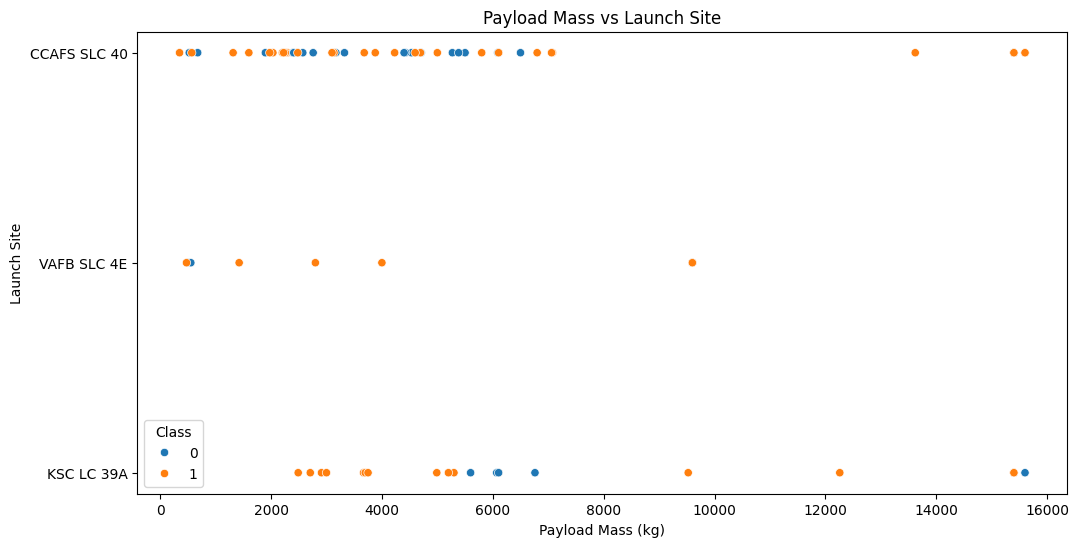

In [9]:
# Dibuje un diagrama de puntos de dispersión con el eje x como Pay Load Mass (masa de carga útil) (kg), el eje 
# y como launch site (sitio de lanzamiento) y el hue como valor de clase (class).
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class")

# Personalizar el gráfico
plt.title('Payload Mass vs Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.show()

Ahora, si observa el gráfico de puntos de dispersión de carga útil versus lugar de lanzamiento, encontrará que para el sitio de lanzamiento VAFB-SLC no se lanzaron cohetes con una masa de carga útil pesada (superior a 10 000).


### TAREA 3: Visualizar la relación entre la tasa de éxito de cada tipo de órbita


A continuación, queremos comprobar visualmente si existe alguna relación entre la tasa de éxito y el tipo de órbita.


Creemos un `bar chart` para la tasa de éxito de cada órbita.


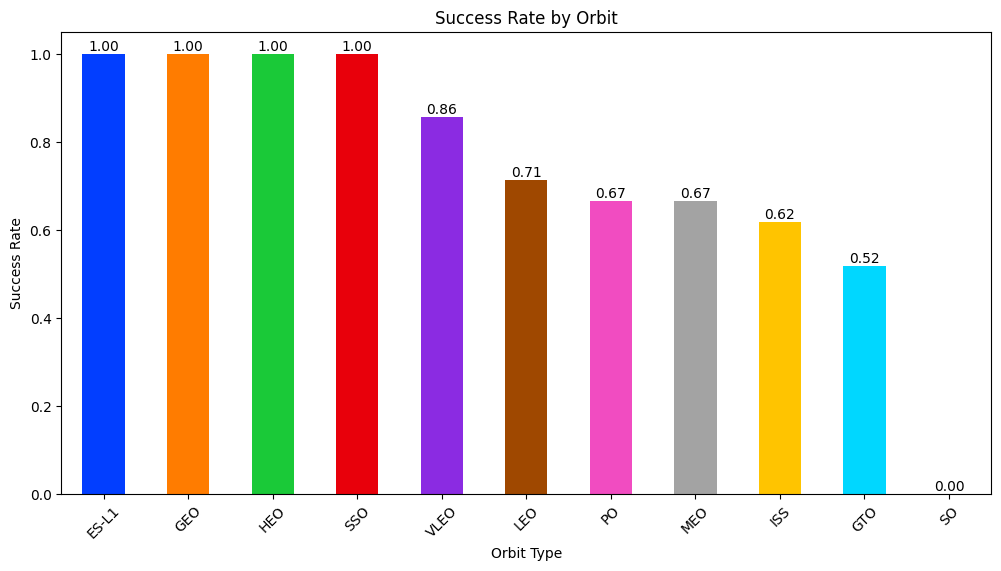

In [11]:
# SUGERENCIA: use el método groupby en la columna Orbit y obtenga la media de la columna Class
# Agrupamos por 'Orbit' y calculamos el promedio (tasa de éxito)
orbit_success_rate = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False)

# Dibujamos el gráfico de barras
plt.figure(figsize=(12,6))
ax = orbit_success_rate.plot(kind='bar', color=sns.color_palette('bright'))

# Añadir etiquetas encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Personalizamos el gráfico
plt.title('Success Rate by Orbit')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()

In [12]:
df[df['Orbit'] == 'LEO']

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
16,17,2015-12-22,Falcon 9,2034.000000,LEO,CCAFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857,1
29,30,2017-05-01,Falcon 9,6104.959412,LEO,KSC LC 39A,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,3.0,1,B1032,-80.603956,28.608058,1
37,38,2017-09-07,Falcon 9,4990.000000,LEO,KSC LC 39A,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,4.0,1,B1040,-80.603956,28.608058,1
43,44,2018-01-08,Falcon 9,6104.959412,LEO,CCAFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,4.0,1,B1043,-80.577366,28.561857,1


Analice el gráfico de barras trazado e intente encontrar qué órbitas tienen una alta tasa de éxito.


### TAREA 4: Visualizar la relación entre FlightNumber (el número de vuelo) y Orbit type (el tipo de órbita)


Para cada órbita, queremos ver si existe alguna relación entre el número de vuelo y el tipo de órbita.


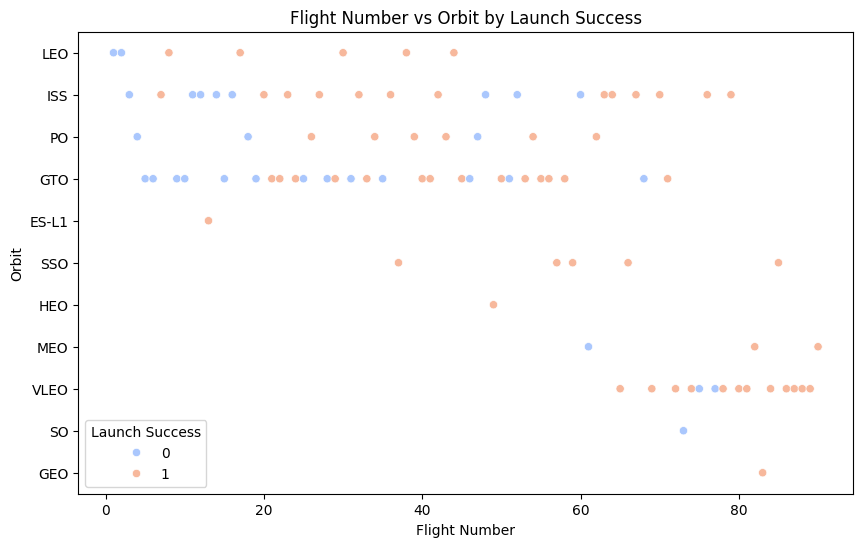

In [13]:
# Dibuje un gráfico de puntos de dispersión con el eje x como FlightNumber y el eje y como Orbit, y el tono como el valor de la clase (class).
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='coolwarm')

plt.title('Flight Number vs Orbit by Launch Success')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.legend(title='Launch Success')
plt.show()

Deberías ver que en la órbita LEO el éxito aparece relacionado con el número de vuelos; por otro lado, no parece haber relación entre el número de vuelos cuando está en órbita GTO.


### TAREA 5: Visualizar la relación entre Payload (la carga útil) y el tipo de Orbit (órbita)


De manera similar, podemos trazar los gráficos de puntos de dispersión de Payload (carga útil) vs. Orbit (órbita) para revelar la relación entre la carga útil y el tipo de órbita.


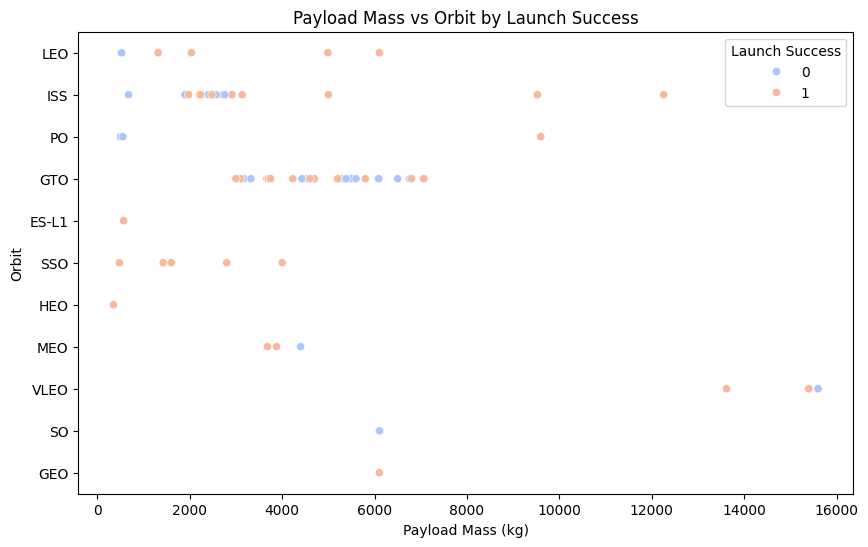

In [14]:
# Dibuje un gráfico de puntos de dispersión con el eje x como carga útil, el eje y como órbita y el tono como valor de clase.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='coolwarm')

plt.title('Payload Mass vs Orbit by Launch Success')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')
plt.legend(title='Launch Success')
plt.show()

Con cargas útiles pesadas, la tasa de aterrizaje exitosa o positiva es mayor para la misión Polar, LEO e ISS.

Sin embargo, para GTO no podemos distinguir esto con precisión, ya que aquí se presentan tanto la tasa de aterrizaje positiva como la negativa (misión fallida).




### TAREA 6: Visualizar la tendencia anual de éxito del lanzamiento


Puede trazar un gráfico de líneas con el eje x como <code>Year</code> y el eje y como average success rate (tasa de éxito promedio), para obtener la tendencia de éxito de lanzamiento promedio.


La función le ayudará a obtener el año a partir de la fecha:


In [15]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

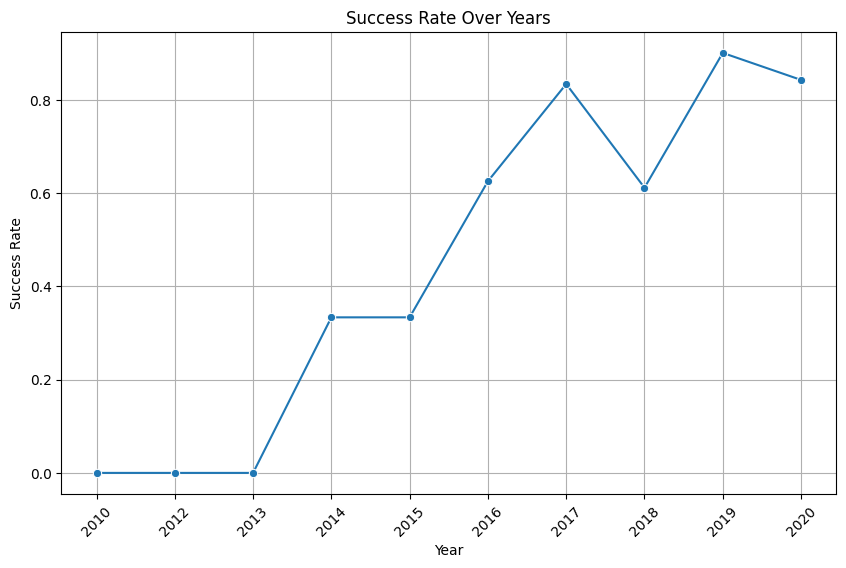

In [16]:
# Dibuje un gráfico de líneas con el eje x como el año extraído y el eje y como la tasa de éxito.
df['Year'] = Extract_year(df['Date'])
yearly_success_rate = df.groupby('Year')['Class'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_success_rate.index, y=yearly_success_rate.values, marker='o')
plt.title('Success Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Se puede observar que la tasa de éxito desde 2013 siguió aumentando hasta 2017 (estable en 2014) y después de 2015 comenzó a aumentar.


## Características Ingeniería

A esta altura, ya debería tener algunas ideas preliminares sobre cómo cada variable importante afectaría la tasa de éxito; seleccionaremos las características que se utilizarán en la predicción del éxito en el módulo futuro.


In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TAREA 7: Crear dummy variables (variables ficticias) para columnas categóricas


Utilice la función <code>get_dummies</code> y el dataframe <code>features</code> para aplicar OneHotEncoder a las columnas <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code> y <code>Serial</code>. Asigne el valor a la variable <code>features_one_hot</code> y muestre los resultados mediante el método head. El dataframe de resultados debe incluir todas las características, incluidas las codificadas.

-------------------------------------

Aquí el objetivo es aplicar One Hot Encoding a las columnas categóricas del dataframe features y guardar el resultado en features_one_hot, de manera que todas las columnas (las originales numéricas + las nuevas codificadas) estén juntas.

- pd.get_dummies() automáticamente crea una columna nueva por cada valor único encontrado en las columnas categóricas.

- El parámetro columns=[...] indica en qué columnas hacer OneHotEncoding (no en todo el dataframe).

- El resto de las columnas numéricas se mantienen igual.

In [18]:
# SUGERENCIA: Utilice la función get_dummies() en las columnas categóricas
# Aplicamos OneHotEncoding sólo a las columnas indicadas
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Mostramos los primeros registros para comprobar
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TAREA 8: Convertir todas las columnas numéricas a `float64`


Ahora que nuestro marco de datos <code>features_one_hot</code> solo contiene números, convierte todo el marco de datos al tipo de variable <code>float64</code>


In [19]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

Ahora podemos exportarlo a un <b>CSV</b> para la siguiente sección, pero para que las respuestas sean consistentes, en el próximo laboratorio proporcionaremos datos en un rango de fechas preseleccionado.


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
